In [1]:
# Imports
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
# File path variables

jpgs_fp = './../data/jpgs/'
metadata_fp="./../data/HAM10000_metadata.csv"

In [4]:
# Splitting the data into train and validation

datagen = ImageDataGenerator(validation_split=0.2) # if you want to split the dataset into training and validation

train_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    directory=jpgs_fp,
    x_col="image_id", # column name containing the image_ids
    y_col="dx",   # column name for the labels acc to metadata file
    subset="training",
    class_mode="categorical",
    target_size=(128, 128), # or any other size you want
    batch_size=32
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    directory=jpgs_fp,
    x_col="image_id",
    y_col="dx",
    subset="validation",
    class_mode="categorical",
    target_size=(128, 128), # or any other size you want
    batch_size=32
)

# Comments
# The above code will create two generators, one for training and one for validation.
# A test set is not needed as we will be using the validation set for testing. 
# The generators will load the images from the jpgs folder and apply the transformations specified in the ImageDataGenerator. 
# The images will be resized to 128x128 pixels and the labels will be one-hot encoded. The generators will yield batches of 32 images and labels.
# Could be transformed into a function to be used in the model

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


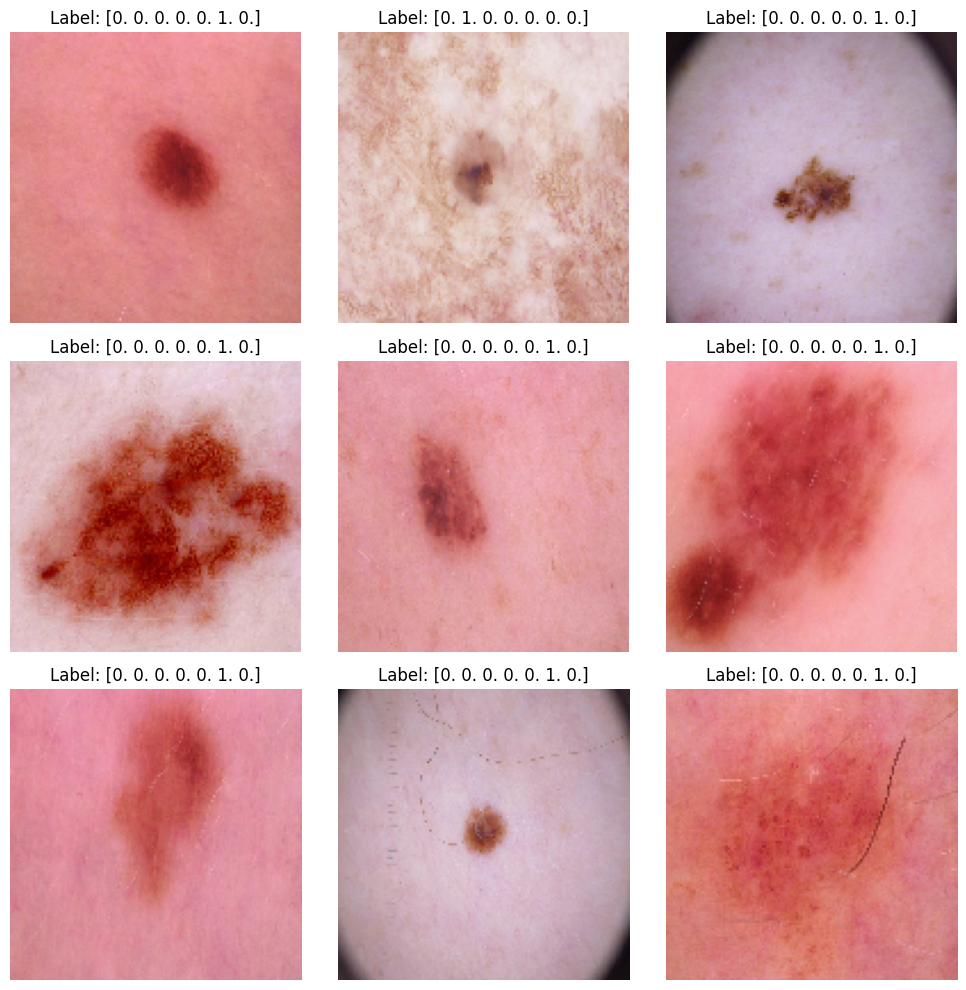

In [7]:
# Previewing the images using matplotlib

import matplotlib.pyplot as plt

images, labels = next(train_generator) 

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i].astype('uint8')) 
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()